<a href="https://colab.research.google.com/github/wanutchapornmun/Statistical-Learning-Labs/blob/main/229351_LAB07_660510561.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ปฏิบัติการครั้งที่ 6 กระบวนวิชา 229351 Statistical Learning for Data Science

คำชี้แจง

ให้เริ่มทำปฏิบัติการจาก colab notebook ที่กำหนดให้ จากนั้น share แล้วส่ง link มาใน mango.cmu.ac.th

ดาวน์โหลดข้อมูลรถยนต์ชนิดต่างใน link ข้างล่างนี้
https://donlapark.pages.dev/229351/data/Auto.csv
หรือรันโค้ดข้างล่าง

In [256]:
# import module ที่ต้องใช้
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# StatsModels
!pip install statsmodels --quiet
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Download the file
!wget https://donlapark.pages.dev/229351/data/Auto.csv

--2025-08-15 21:41:12--  https://donlapark.pages.dev/229351/data/Auto.csv
Resolving donlapark.pages.dev (donlapark.pages.dev)... 172.66.44.200, 172.66.47.56, 2606:4700:310c::ac42:2cc8, ...
Connecting to donlapark.pages.dev (donlapark.pages.dev)|172.66.44.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18079 (18K) [text/csv]
Saving to: ‘Auto.csv.6’

Auto.csv.6          100%[===================>]  17.66K  --.-KB/s    in 0s      

2025-08-15 21:41:12 (54.3 MB/s) - ‘Auto.csv.6’ saved [18079/18079]



In [257]:
# อ่านไฟล์ csv ก่อนเพื่อหา missing values
auto = pd.read_csv('Auto.csv', na_values=["?"])

# ลบแถวที่มี missing values
auto = auto.dropna()

# ลบ column(axis=1) name และ origin ออก
#auto = auto.drop(['name', 'origin'],axis=1)

auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


# Linear model diagnosis

In [258]:
# simple linear regression on Auto dataset
# วิเคราะห์ความสัมพันธ์ระหว่าง mpg และ horsepower
auto_lr = smf.ols('mpg ~ horsepower ', data=auto).fit()
print(auto_lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Fri, 15 Aug 2025   Prob (F-statistic):           7.03e-81
Time:                        21:41:12   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.0

### คำนวณ Residuals $y_i-\hat{y}_i$

In [259]:
#Fitted values
auto_fitted = auto_lr.predict(auto)

#Residuals
auto_res = auto['mpg']-auto_fitted

print(auto_res)

0      -1.416046
1       1.108520
2       1.740849
3      -0.259151
4      -0.837598
         ...    
392     0.638786
393    12.272065
394     5.323097
395     0.533873
396     4.007407
Length: 392, dtype: float64


### หรือสามารถดึง predictions และ residuals จากโมเดลได้โดยตรง

In [260]:
# Fitted values
auto_fitted_ = auto_lr.fittedvalues

# Residuals
auto_res_ = auto_lr.resid

print(auto_res)

0      -1.416046
1       1.108520
2       1.740849
3      -0.259151
4      -0.837598
         ...    
392     0.638786
393    12.272065
394     5.323097
395     0.533873
396     4.007407
Length: 392, dtype: float64


### 1. ทดสอบ non-linearity

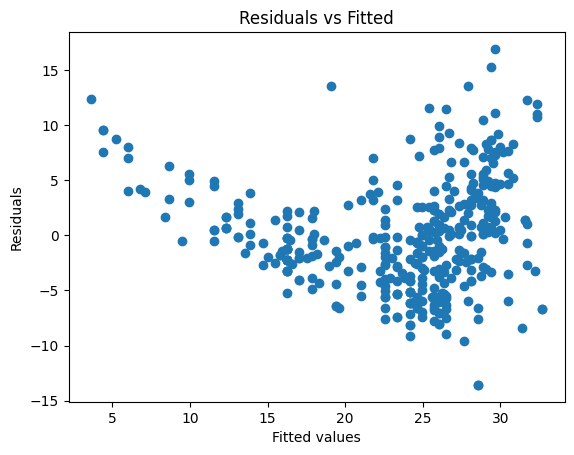

In [261]:
plt.scatter(auto_fitted, auto_res)
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals');

0      19.416046
1      13.891480
2      16.259151
3      16.259151
4      17.837598
         ...    
392    26.361214
393    31.727935
394    26.676903
395    27.466127
396    26.992593
Length: 392, dtype: float64


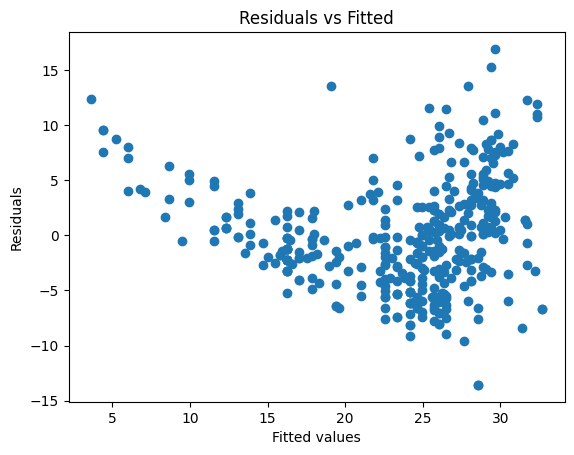

In [262]:
plt.scatter(auto_lr.fittedvalues, auto_lr.resid)
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals');

print(auto_lr.fittedvalues)

In [263]:
auto_lr2 = smf.ols('mpg ~ horsepower+I(horsepower**2)', data=auto).fit() # ต้องใส่ I ด้วย I เป็นตัวบอกว่าเป็น ฟังก์ชัน
print(auto_lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     428.0
Date:                Fri, 15 Aug 2025   Prob (F-statistic):           5.40e-99
Time:                        21:41:13   Log-Likelihood:                -1133.2
No. Observations:                 392   AIC:                             2272.
Df Residuals:                     389   BIC:                             2284.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             56.9001      1

0      17.091508
1      13.480156
2      14.658717
3      14.658717
4      15.752059
         ...    
392    25.908837
393    35.985609
394    26.422834
395    27.750895
396    26.946675
Length: 392, dtype: float64


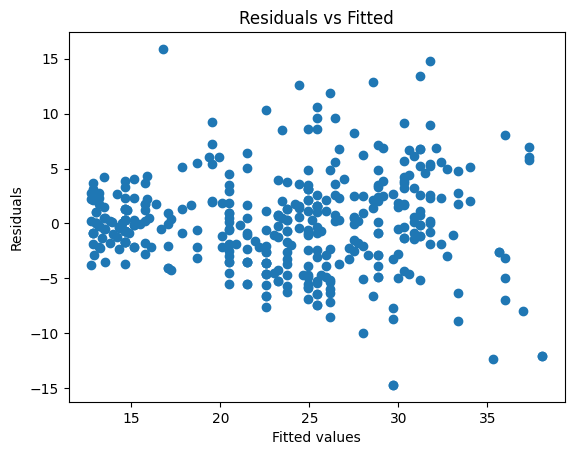

In [264]:
plt.scatter(auto_lr2.fittedvalues, auto_lr2.resid)
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals');

print(auto_lr2.fittedvalues)
# ไม่มี pattern แล้ว การกระจายของ residuals มีทั้งบวก ลบ
# เป็นตัวที่บอกว่า notcie ไม่คงที่

### 2. ทดสอบ independence of errors
2.1 ตรวจสอบโดยการ plot time vs residuals (ถ้าสามารถทำได้)

2.2 ตรวจสอบด้วย Durbin-Wutson test  

H0: There is no correlation among the residuals.  
H1: The residuals are correlated.

The Durbin-Watson statistic ranges in value from 0
to 4. A value near 2 indicates non-correlation; a value toward 0 indicates positive
correlation; a value toward 4 indicates negative correlation.

Accept H1 if d < dL  --> Dependent residuals
Accept H0 if d > dU  --> Independent residuals

Durbin-Watson table: https://www.real-statistics.com/statistics-tables/durbin-watson-table/

In [265]:
auto_lr2 = smf.ols('mpg ~ horsepower+I(horsepower**2)', data=auto).fit()
print(auto_lr2.summary())
# ถ้าใส่ตัวแปรต้นที่เกี่ยวกับเวลาจะช่วยให้ค่า...เพิ่มขึ้น

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     428.0
Date:                Fri, 15 Aug 2025   Prob (F-statistic):           5.40e-99
Time:                        21:41:13   Log-Likelihood:                -1133.2
No. Observations:                 392   AIC:                             2272.
Df Residuals:                     389   BIC:                             2284.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             56.9001      1

### ดูตาราง Durbin-Watson Alpha = .05 n = 350 และ k = 2

ได้ค่า dL = 1.813 dU = 1.836

ดังนั้น Reject H0 -- มี correlation ระหว่าง residuals

In [266]:
auto['origin'] = auto['origin'].astype(str)
auto['origin'].unique()

array(['1', '3', '2'], dtype=object)

In [267]:
auto_lr2 = smf.ols('mpg ~ horsepower+I(horsepower**2) + year + origin', data=auto).fit()
print(auto_lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     326.8
Date:                Fri, 15 Aug 2025   Prob (F-statistic):          2.83e-136
Time:                        21:41:13   Log-Likelihood:                -1036.8
No. Observations:                 392   AIC:                             2086.
Df Residuals:                     386   BIC:                             2109.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -4.1540      4

### 3. ทดสอบ constant variance

### ใช้ Breush-Pagan test


H0: The residuals are distributed with equal variance  
H1: The residuals are not distributed with equal variance


In [268]:
import statsmodels.stats.api as sms

name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = sms.het_breuschpagan(auto_lr2.resid, auto_lr2.model.exog)
pd.DataFrame({'Name':name, 'value':test})

,Name,value
0,Lagrange multiplier statistic,24.641077
1,p-value,0.000163
2,f-value,5.178290
3,f p-value,0.000130


### p-value < 0.05 ดังนั้น accept H1

In [269]:
auto_lr3 = smf.ols('I(np.log(mpg)) ~ horsepower+I(horsepower**2)', data=auto).fit() # ใส่ log เพื่อทำให้กราฟเรียบขึ้น
print(auto_lr3.summary()) # residual เล็กลง เมื่อ Y มีค่ามาก ๆ

                            OLS Regression Results                            
Dep. Variable:         I(np.log(mpg))   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     532.2
Date:                Fri, 15 Aug 2025   Prob (F-statistic):          4.54e-112
Time:                        21:41:13   Log-Likelihood:                 125.48
No. Observations:                 392   AIC:                            -245.0
Df Residuals:                     389   BIC:                            -233.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              4.4022      0

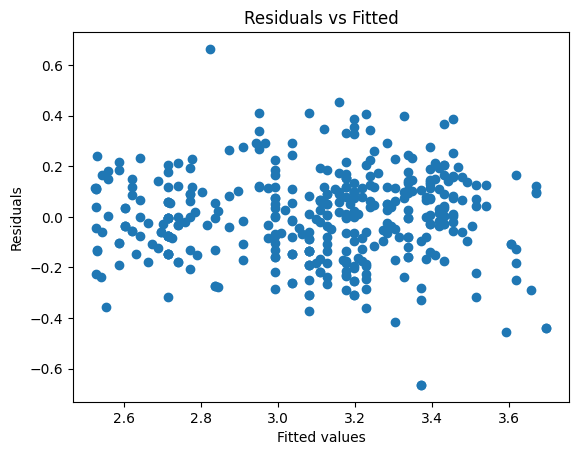

In [270]:
plt.scatter(auto_lr3.fittedvalues, auto_lr3.resid)
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals');

### ลอง Breush-Pagan test อีกครั้ง

In [271]:
# test ความคงที่ของความแปรปรวน เราอยากได้ H0 คือ p value ต้องมากว่า 0.05
name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = sms.het_breuschpagan(auto_lr3.resid, auto_lr3.model.exog)
pd.DataFrame({'Name':name, 'value':test})

,Name,value
0,Lagrange multiplier statistic,5.202329
1,p-value,0.074187
2,f-value,2.615975
3,f p-value,0.074382


### p-value ฬ 0.05 ดังนั้น accept Hจ

### 4., 5. หา outliers และ leverage points

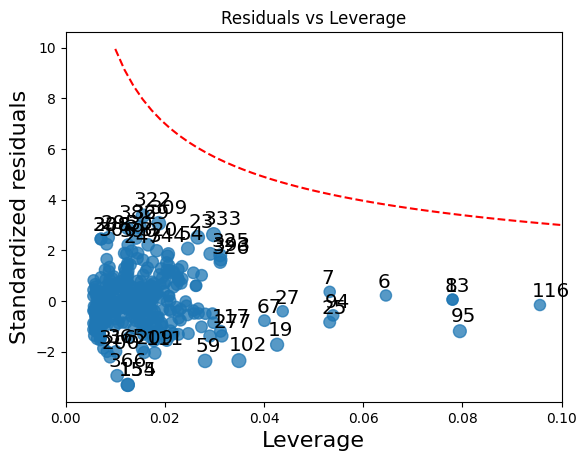

In [272]:
import statsmodels.graphics.api as smg

smg.influence_plot(auto_lr2, size=10)

#Cook's distance line ที่ระดับ 0.5
p = 2 # จำนวนตัวแปรต้น
x = np.linspace(0.01, 0.1, 50)
plt.plot(x, np.sqrt(0.5*p*(1 - x)/x), color='red', linestyle='dashed') # เส้นสีแดง ถ้าข้อมูลไม่เกินเส้นสีแดง ถือว่า OK ถ้าเกินเส้นสีแดง = มี outlier

plt.xlim(0,0.1)
plt.xlabel('Leverage')
plt.ylabel('Standardized residuals')
plt.title('Residuals vs Leverage');

### 6. ทดสอบ multicollinearity

ลบตัวแปรที่มีค่า VIF > 10

In [273]:
print(auto_lr3.model.exog)  # matrix of exogenous variables ดึง matrix ของตัวแปรต้น

[[1.0000e+00 1.3000e+02 1.6900e+04]
 [1.0000e+00 1.6500e+02 2.7225e+04]
 [1.0000e+00 1.5000e+02 2.2500e+04]
 ...
 [1.0000e+00 8.4000e+01 7.0560e+03]
 [1.0000e+00 7.9000e+01 6.2410e+03]
 [1.0000e+00 8.2000e+01 6.7240e+03]]


In [274]:
print(auto_lr3.model.exog_names)  # names of exogenous variables list ของชื่อตัวแปรต้น

['Intercept', 'horsepower', 'I(horsepower ** 2)']


In [275]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

auto_lr4 = smf.ols('I(np.log(mpg)) ~ cylinders \
                                     + horsepower \
                                     + displacement \
                                     + weight \
                                     + acceleration \
                                     + origin', data=auto).fit()

exog = auto_lr4.model.exog
exog_names = auto_lr4.model.exog_names

for i in range(1,len(exog_names)):
    print(exog_names[i], vif(exog, i))

origin[T.2] 1.5975932898137288
origin[T.3] 1.762531193198889
cylinders 10.735068059533871
horsepower 9.519092728525054
displacement 22.66393054637987
weight 10.66132161010088
acceleration 2.6109867622704344


In [276]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

auto_lr4 = smf.ols('I(np.log(mpg)) ~ cylinders \
                                     + horsepower \
                                     + weight \
                                     + acceleration \
                                     + origin', data=auto).fit()

exog = auto_lr4.model.exog
exog_names = auto_lr4.model.exog_names

for i in range(1,len(exog_names)):
    print(exog_names[i], vif(exog, i))
# backward
# vif มากกว่า 10 เอาออก มันจะเอาออกที่ละตัว
# รอบแรก เอา displacement (เป็นตัวที่มากกว่า 10 มากที่สุด)ออกก่อน แล้วรัน สรุปว่า ค่าอื่น ๆ น้อยกว่า 10

origin[T.2] 1.4236141503131068
origin[T.3] 1.590479755612265
cylinders 6.168429017909142
horsepower 8.506563453857197
weight 9.012374705268801
acceleration 2.5893782394047844


### Exercise

ดาวน์โหลดข้อมูลรถยนต์ชนิดต่างใน link ข้างล่างนี้
https://donlapark.pages.dev/229351/data/Carseats.csv
หรือรันโค้ดข้างล่าง

In [277]:
# Download the file
!wget https://donlapark.pages.dev/229351/data/Carseats.csv

--2025-08-15 21:41:14--  https://donlapark.pages.dev/229351/data/Carseats.csv
Resolving donlapark.pages.dev (donlapark.pages.dev)... 172.66.44.200, 172.66.47.56, 2606:4700:310c::ac42:2cc8, ...
Connecting to donlapark.pages.dev (donlapark.pages.dev)|172.66.44.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19044 (19K) [text/csv]
Saving to: ‘Carseats.csv.6’

Carseats.csv.6      100%[===================>]  18.60K  --.-KB/s    in 0s      

2025-08-15 21:41:14 (79.4 MB/s) - ‘Carseats.csv.6’ saved [19044/19044]




Sales

    Unit sales (in thousands) at each location
CompPrice

    Price charged by competitor at each location
Income

    Community income level (in thousands of dollars)
Advertising

    Local advertising budget for company at each location (in thousands of dollars)
Population

    Population size in region (in thousands)
Price

    Price company charges for car seats at each site
ShelveLoc

    A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
Age

    Average age of the local population
Education

    Education level at each location
Urban

    A factor with levels No and Yes to indicate whether the store is in an urban or rural location
US

    A factor with levels No and Yes to indicate whether the store is in the US or not

In [278]:
# อ่านไฟล์ csv ก่อนเพื่อหา missing values
carseats = pd.read_csv('Carseats.csv')

carseats.head()
# ตัวแปรตาม คือ Sales อยู่ด้านซ้ายสุด

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [279]:
all_predictors = '+'.join(carseats.columns.drop('Sales')) #ใช้สูตร 'Sales ~' + all_predictors ในการสร้างโมเดล

'Sales ~ ' + all_predictors # สูตรในการ fit regression

'Sales ~ CompPrice+Income+Advertising+Population+Price+ShelveLoc+Age+Education+Urban+US'

### Bad = Intercept + other values
### Medium = Intercept + other values + ShelveLoc(Med)*1
### Good = Intercept + other values + ShelveLoc(Good)*1

แปลงข้อมูลด้วย ใส่กำลัง 2 หรือว่า ใส่ log เพื่อทำให้ข้อมูลดีขึ้น ?

###จงสร้าง residual plot และ influence plot แล้วตอบคำถามต่อไปนี้

1. สมมติว่าตัวแปรอื่นมีค่าเท่ากัน โดยเฉลี่ยแล้ว ยอดขายของเบาะรถที่วางบนชั้นที่มีคุณภาพปานกลาง (ShelveLoc (Medium)) กับชั้นที่มีคุณภาพต่ำ (ShelveLoc (Bad)) ต่างกันอย่างไร ต่างกันเท่าไหร่
2. สมมติว่าตัวแปรอื่นมีค่าเท่ากัน โดยเฉลี่ยแล้ว ยอดขายของเบาะรถที่วางบนชั้นที่มีคุณภาพดี (ShelveLoc (Good)) กับชั้นที่มีคุณภาพปานกลาง (ShelveLoc (Medium)) ต่างกันอย่างไร ต่างกันเท่าไหร่
3. จงตรวจสอบว่าข้อมูลที่ใช้มีความเหมาะสมกับการสร้าง linear regression หรือไม่ โดยพิจารณาสิ่งต่างๆเหล่านี้พร้อมกับให้เหตุผล  
  3.1 Non-linearity  
  3.2 Independence of errors  
  3.3 Constant variance  
  3.4 Outliers  
  3.5 Leverage points  
  3.6 Multicollinearity


In [280]:
# ลบแถวที่มี missing values
carseats = carseats.dropna()

carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [281]:
carseats_lr01 = smf.ols('Sales ~ ShelveLoc', data=carseats).fit()
print(carseats_lr01.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     92.23
Date:                Fri, 15 Aug 2025   Prob (F-statistic):           1.27e-33
Time:                        21:41:14   Log-Likelihood:                -906.03
No. Observations:                 400   AIC:                             1818.
Df Residuals:                     397   BIC:                             1830.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               5.5229    

3.1 Non-linearity

In [282]:
print(4.6911 - 1.7837)

2.9073999999999995


In [284]:
carseats_lr02 = smf.ols('Sales ~ CompPrice + Income + Advertising + Population + Price + ShelveLoc + Age + Education + Urban + US', data=carseats).fit()
print(carseats_lr02.summary()) # Intercept = ค่าเฉลี่ยของ bad

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     243.4
Date:                Fri, 15 Aug 2025   Prob (F-statistic):          1.60e-166
Time:                        21:41:46   Log-Likelihood:                -568.99
No. Observations:                 400   AIC:                             1162.
Df Residuals:                     388   BIC:                             1210.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               5.6606    

0       7.237383
1      12.415547
2       9.285714
3       8.507433
4       6.091964
         ...    
395    13.078909
396     6.867465
397     7.173182
398     5.435595
399     9.440380
Length: 400, dtype: float64


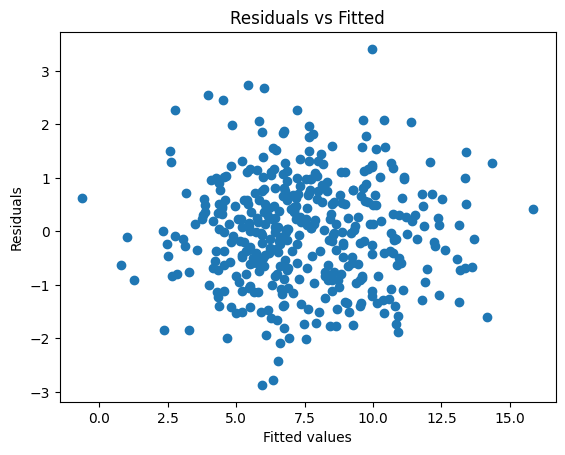

In [285]:
plt.scatter(carseats_lr02.fittedvalues, carseats_lr02.resid)
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals');

print(carseats_lr02.fittedvalues)

3.2 Independence of errors
1. ตรวจสอบโดยการ plot time vs residuals (ถ้าสามารถทำได้)

2. ตรวจสอบด้วย Durbin-Wutson test

H0: There is no correlation among the residuals. \
H1: The residuals are correlated.

The Durbin-Watson statistic ranges in value from 0 to 4. A value near 2 indicates non-correlation; a value toward 0 indicates positive correlation; a value toward 4 indicates negative correlation.

Accept H1 if d < dL --> Dependent residuals \
Accept H0 if d > dU --> Independent residuals

Durbin-Watson table: https://www.real-statistics.com/statistics-tables/durbin-watson-table/

ดูตาราง Durbin-Watson Alpha = .05 n = 400 และ k = 10
ได้ค่า dL = 1.785 dU = 1.887 \
Durbin-Watson(d) = 2.013

ดังนั้น Accept H0 --> ไม่มี correlation ระหว่าง residuals

3.3 constant variance \
ใช้ Breush-Pagan test \
H0: The residuals are distributed with equal variance \
H1: The residuals are not distributed with equal variance

In [286]:
import statsmodels.stats.api as sms

name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = sms.het_breuschpagan(carseats_lr02.resid, carseats_lr02.model.exog)
pd.DataFrame({'Name':name, 'value':test})

,Name,value
0,Lagrange multiplier statistic,7.328659
1,p-value,0.771878
2,f-value,0.658316
3,f p-value,0.777857


p-value > 0.05 ดังนั้น accept H0 (The residuals are distributed with equal variance)

3.4 Outliers และ 3.5 Leverage points



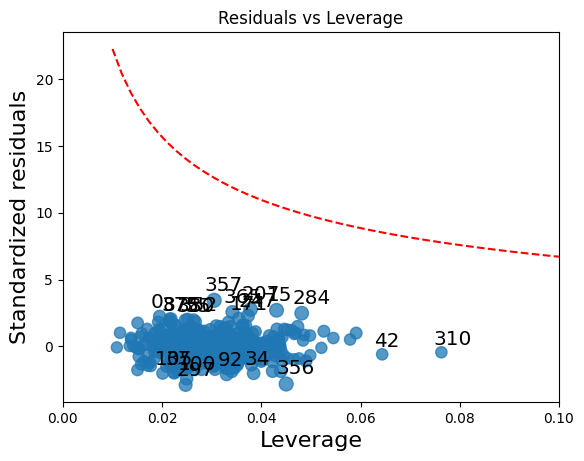

In [287]:
import statsmodels.graphics.api as smg

smg.influence_plot(carseats_lr02, size=10)

#Cook's distance line ที่ระดับ 0.5
p = 10 # จำนวนตัวแปรต้น
x = np.linspace(0.01, 0.1, 50)
plt.plot(x, np.sqrt(0.5*p*(1 - x)/x), color='red', linestyle='dashed') # ถ้าข้อมูลไม่เกินเส้นสีแดง ถือว่า OK ถ้าเกินเส้นสีแดง = มี outlier

plt.xlim(0,0.1)
plt.xlabel('Leverage')
plt.ylabel('Standardized residuals')
plt.title('Residuals vs Leverage');

3.6 multicollinearity
ลบตัวแปรที่มีค่า VIF > 10

In [288]:
print(carseats_lr02.model.exog) # ดึง matrix ของตัวแปรต้น
print(carseats_lr02.model.exog_names) # list ของชื่อตัวแปรต้น

[[  1.   0.   0. ... 120.  42.  17.]
 [  1.   1.   0. ...  83.  65.  10.]
 [  1.   0.   1. ...  80.  59.  12.]
 ...
 [  1.   0.   1. ... 159.  40.  18.]
 [  1.   0.   0. ...  95.  50.  12.]
 [  1.   1.   0. ... 120.  49.  16.]]
['Intercept', 'ShelveLoc[T.Good]', 'ShelveLoc[T.Medium]', 'Urban[T.Yes]', 'US[T.Yes]', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education']


In [289]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

carseats_lr03 = smf.ols('Sales ~ CompPrice \
                            + Income \
                            + Advertising \
                            + Population \
                            + Price \
                            + ShelveLoc \
                            + Age \
                            + Education \
                            + Urban \
                            + US', data=carseats).fit()

exog = carseats_lr03.model.exog
exog_names = carseats_lr03.model.exog_names

for i in range(1,len(exog_names)):
    print(exog_names[i], vif(exog, i))
# backward
# vif มากกว่า 10 ต้องเอาตัวแปรนั้นออก วิธีนี้จะเอาออกที่ละตัว
# ไม่มีตัวไหนเลยที่ vif มากกว่า 10

ShelveLoc[T.Good] 1.5114108816547631
ShelveLoc[T.Medium] 1.5178815057838553
Urban[T.Yes] 1.0227049034513431
US[T.Yes] 1.980719638938689
CompPrice 1.5546180981239017
Income 1.0247310763870372
Advertising 2.1031356279376445
Population 1.1455343200880395
Price 1.5370677298055464
Age 1.0210506961242922
Education 1.0263422999995275


**Ans** ❗
1. ชั้น Medium ขายได้มากกว่าชั้น Bad ต่างกัน 1.7837 (Medium has 1.7837 more sales than bad)
2. ชั้น Good ขายได้มากกว่าชั้น Medium ต่างกัน 2.9074 \
3. \
 3.1 Non-linearity จากกราฟ Residuals vs Fitted พบว่าความสัมพันธ์ระหว่างตัวแปรต้น และตัวแปรตาม เป็นแบบเชิงเส้น(จุดกระจายรอบ 0) ดังนั้น จึงเหมาะสมกับการสร้าง linear regression \
 3.2 Independence of errors ค่า Durbin-Watson(d) = 2.013 มีค่าใกล้ 2 แสดงว่า residuals ไม่มี autocorrelation ดังนั้น จึงเหมาะสมกับการสร้าง linear regression \
 3.3 Constant variance ค่า residuals มีความแปรปรวนเท่ากัน (homoscedasticity) ดังนั้น จึงเหมาะสมกับการสร้าง linear regression \
 3.4 Outliers และ 3.5 Leverage points ไม่พบค่าผิดปกติ(outliers) และไม่มี high leverage point ดังนั้น จึงเหมาะสมกับการสร้าง linear regression \
 3.6 Multicollinearity ไม่มีค่า vif > 10 เลย ดังนั้น จึงเหมาะสมกับการสร้าง linear regression \